# Social media engagement

In [1]:
#Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the CSV file
file_path = 'input/social_media_engagement_data.csv'
data = pd.read_csv(file_path)
# Clean the data
data = data.dropna()

In [3]:
# Display basic statistics and data types
data_info = data.info()
data_describe = data.describe()
data_head = data.head()

#data_info, data_describe, data_head

<class 'pandas.core.frame.DataFrame'>
Index: 1013 entries, 118 to 99962
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Platform            1013 non-null   object 
 1   Post ID             1013 non-null   object 
 2   Post Type           1013 non-null   object 
 3   Post Content        1013 non-null   object 
 4   Post Timestamp      1013 non-null   object 
 5   Likes               1013 non-null   int64  
 6   Comments            1013 non-null   int64  
 7   Shares              1013 non-null   int64  
 8   Impressions         1013 non-null   int64  
 9   Reach               1013 non-null   int64  
 10  Engagement Rate     1013 non-null   float64
 11  Audience Age        1013 non-null   int64  
 12  Audience Gender     1013 non-null   object 
 13  Audience Location   1013 non-null   object 
 14  Audience Interests  1013 non-null   object 
 15  Campaign ID         1013 non-null   object 
 16  Sentimen

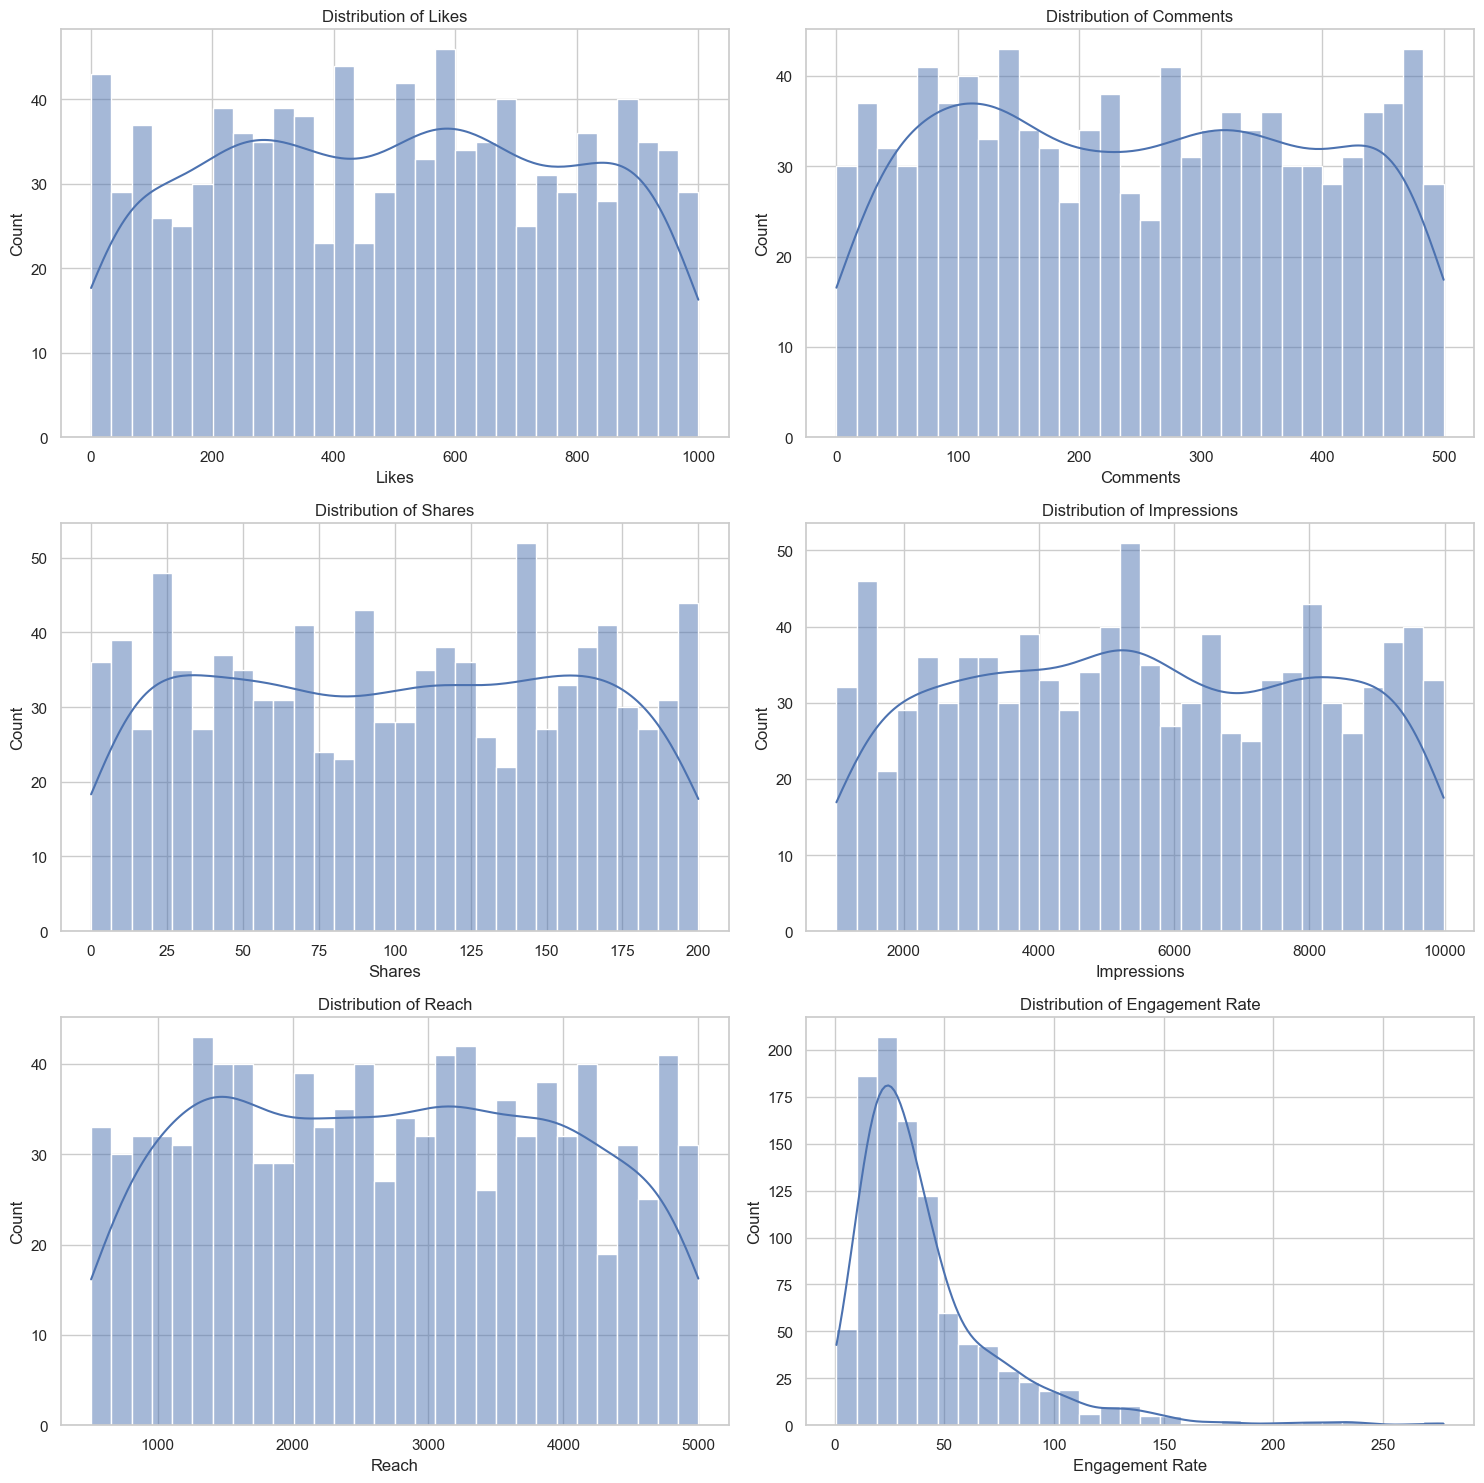

In [4]:
# Set the style of the visualizations
sns.set(style="whitegrid")

# Plot distribution of engagement metrics
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(data['Likes'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Likes')

sns.histplot(data['Comments'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Comments')

sns.histplot(data['Shares'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Shares')

sns.histplot(data['Impressions'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Impressions')

sns.histplot(data['Reach'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Reach')

sns.histplot(data['Engagement Rate'], bins=30, kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Engagement Rate')

plt.tight_layout()
plt.show()

Preprocessing:

In [5]:
# Handle missing values
# For simplicity, we'll drop columns with a high percentage of missing values for this example
data = data.drop(columns=['Campaign ID', 'Influencer ID', 'Sentiment'])

In [6]:
# Encode categorical variables
label_encoders = {}
for column in ['Post Type', 'Audience Gender', 'Audience Location', 'Audience Interests']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
    
# set Platform categories
data['Platform'] = data['Platform'].astype('category')
data['Platform'].categories = ['Facebook', 'Instagram', 'Twitter', 'LinkedIn']

# Convert 'Post Timestamp' to datetime and extract features
data['Post Timestamp'] = pd.to_datetime(data['Post Timestamp'])
data['Post Year'] = data['Post Timestamp'].dt.year
data['Post Month'] = data['Post Timestamp'].dt.month
data['Post Day'] = data['Post Timestamp'].dt.day
data['Post Hour'] = data['Post Timestamp'].dt.hour

# Drop the original 'Post Timestamp' and 'Post ID' columns
data = data.drop(columns=['Post Timestamp', 'Post ID'])

Visualize the data:

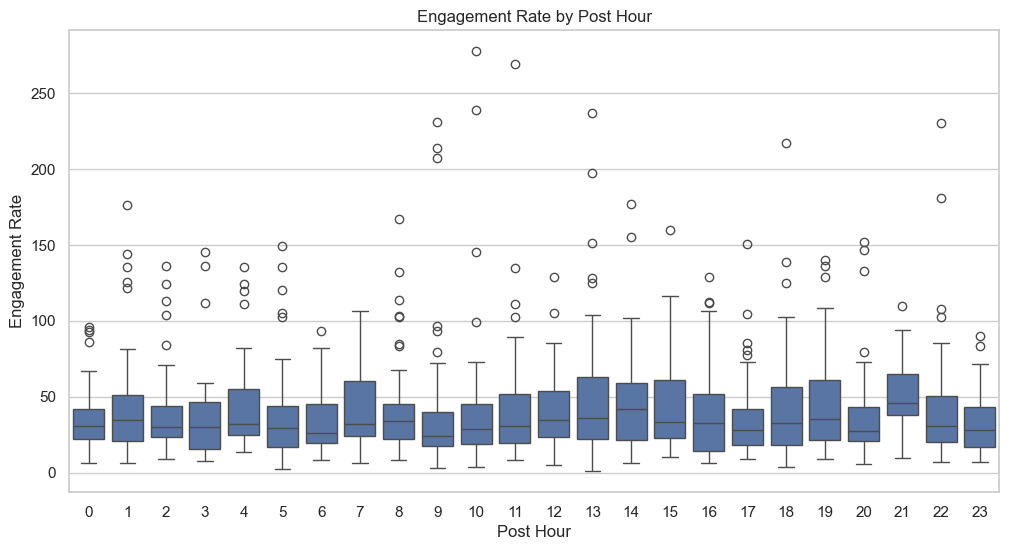

In [7]:
# Create a graph to show post hour and engagement rate
plt.figure(figsize=(12, 6))
sns.boxplot(x='Post Hour', y='Engagement Rate', data=data)
plt.title('Engagement Rate by Post Hour')
plt.show()

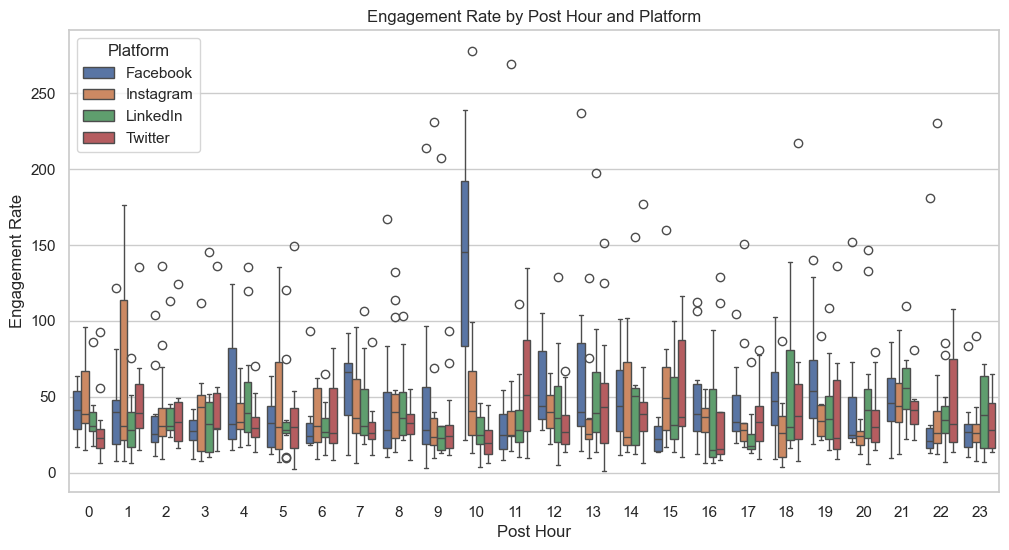

In [8]:
#Show weight of post hour and engagement rate by platform
plt.figure(figsize=(12, 6))
sns.boxplot(x='Post Hour', y='Engagement Rate', data=data, hue='Platform')
plt.title('Engagement Rate by Post Hour and Platform')
plt.show()

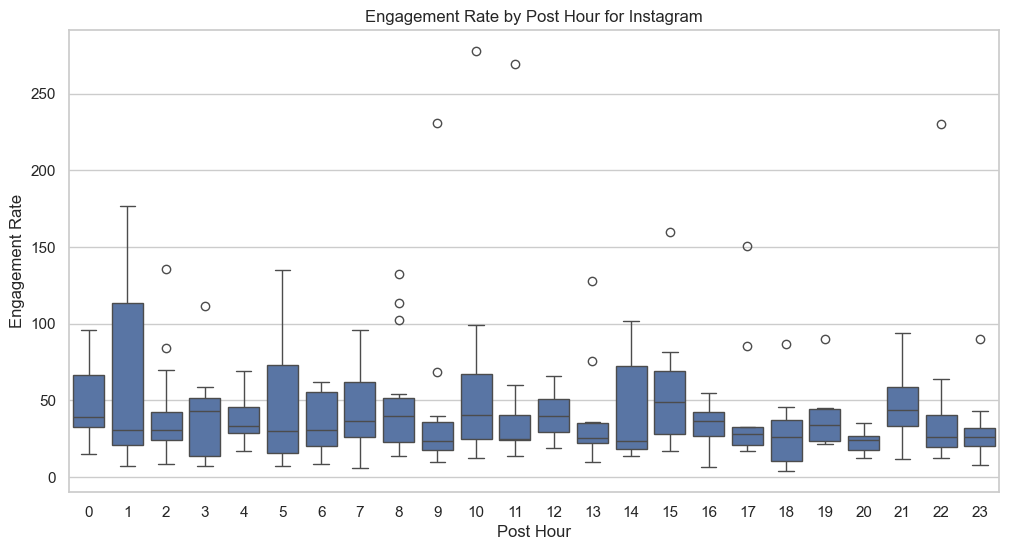

In [9]:
#select only rows where the platform is Instagram
instagram_data = data[data['Platform'] == 'Instagram']
#show engagement rate by post hour for Instagram
plt.figure(figsize=(12, 6))
sns.boxplot(x='Post Hour', y='Engagement Rate', data=instagram_data)
plt.title('Engagement Rate by Post Hour for Instagram')
plt.show()

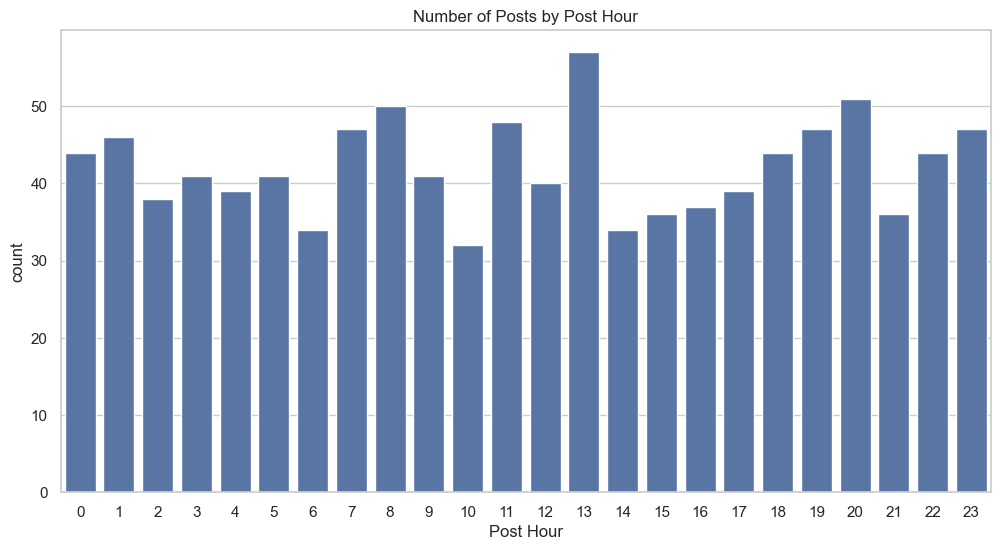

In [10]:
# Show when people are mainly active on social media
plt.figure(figsize=(12, 6))
sns.countplot(x='Post Hour', data=data)
plt.title('Number of Posts by Post Hour')
plt.show()

Predicative analysis:

In [11]:
# Define target variable and features
X = data.drop(columns=['Platform', 'Engagement Rate', 'Post Content'])
y = data['Engagement Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model with fewer estimators to speed up training
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [12]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [14]:

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 4.098750738916258
Mean Squared Error (MSE): 63.39837457812819
R² Score: 0.9568172703011794


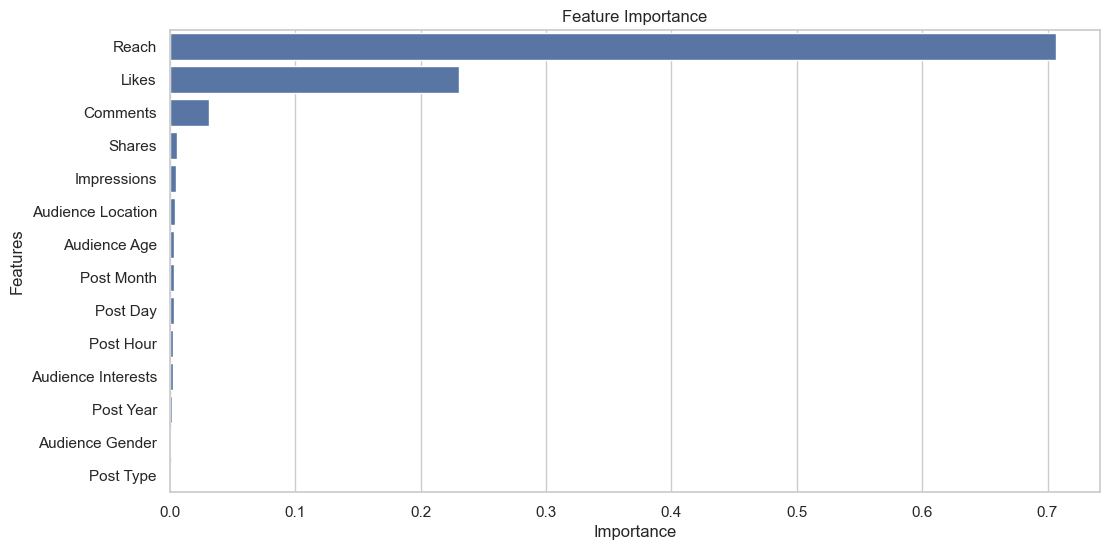

In [15]:
# Show feature importance
feature_importances = model.feature_importances_
features = X.columns
df = pd.DataFrame({'Features': features, 'Importance': feature_importances})
df = df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Features', data=df)
plt.title('Feature Importance')
plt.show()

The best hour to post for maximum engagement is Reach.
